In [2]:
import numpy as np
import scipy.constants as const
import uncertainties as unc
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from datetime import date
%matplotlib inline

In [3]:
df = pd.read_excel('Ammonia_Data (1).xlsx')
df['TIME'] = [datetime.datetime.combine(datetime.date.today(), t) for t in df['TIME']]
df.head()

,DATE,TIME,NH3
0,2021-03-30,2021-06-01 09:47:21.994,13.555095
1,2021-03-30,2021-06-01 09:47:22.930,13.421318
2,2021-03-30,2021-06-01 09:47:23.862,13.215535
3,2021-03-30,2021-06-01 09:47:24.811,12.816156
4,2021-03-30,2021-06-01 09:47:25.756,13.158696


In [4]:
def ad_adj(x,index):
    Datetimes =[]
    Values = []
    for i in x:
        Datetimes.append(i[0:11])
        Values.append(i[index:]) # 17 or 16
    return [Datetimes,Values]

In [5]:
dat = pd.read_csv('Resistance.csv')

In [6]:
sensor_data = pd.DataFrame(np.array(ad_adj(dat.Time.values,15)).T, columns = ['TIME','Resistance'])

In [7]:
sensor_data['Resistance'] = sensor_data['Resistance'].astype(float)
sensor_data['TIME'] = pd.to_datetime(sensor_data['TIME'])
from datetime import datetime, timedelta
sensor_data['TIME'] = sensor_data['TIME'] + timedelta(minutes = 11, seconds = 13)

In [8]:
df = df[ df['TIME'] > sensor_data.at[0,'TIME']]
df = df[ df['TIME'] < sensor_data['TIME'].iloc[-1]]

In [9]:
sensor_data = sensor_data[sensor_data['Resistance'] < 150000] 
sensor_data = sensor_data[sensor_data['Resistance'] > 30000] 
sensor_data = sensor_data.sort_values(by = 'TIME')

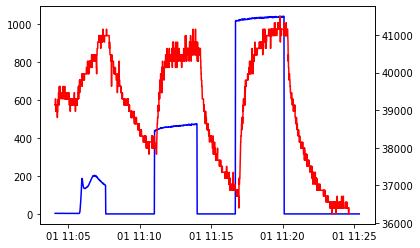

In [10]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(df['TIME'],df['NH3'],'-b') #Piccaro
ax2.plot(sensor_data['TIME'],sensor_data['Resistance'],'-r')     #Sensor

In [11]:
from scipy.ndimage import gaussian_filter1d
sensor_data['Resistance_Smooth'] = gaussian_filter1d(sensor_data['Resistance'], 30)

<ipython-input-12-9bddde7f78ad>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels([0,5,10,15,20])


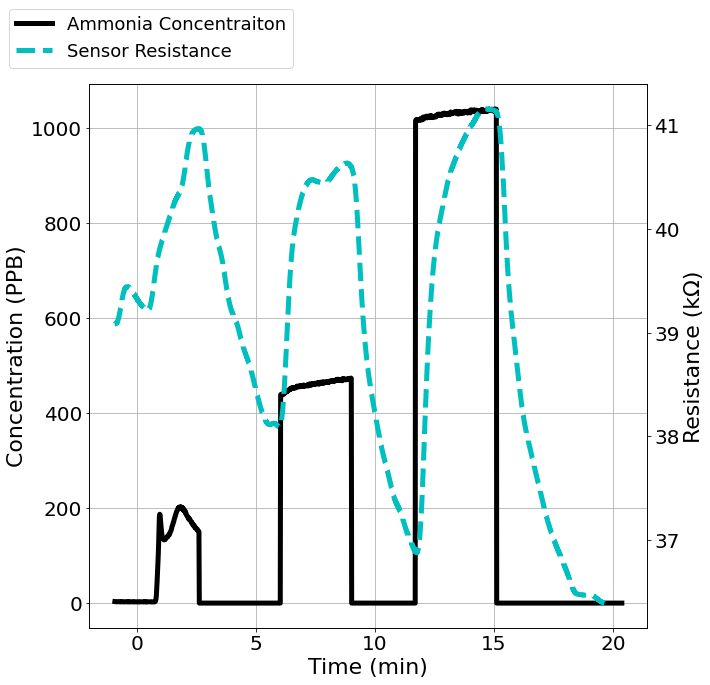

In [12]:
fig, ax1 = plt.subplots(figsize = (10,10))
ax2 = ax1.twinx()
ax1.grid()
ax1.plot(df['TIME'],df['NH3'],'-k', label = 'Ammonia Concentraiton', linewidth = 5) #Piccaro
ax2.plot(sensor_data['TIME'],sensor_data['Resistance_Smooth']/1000,'--c',label = 'Sensor Resistance', linewidth = 5)#Sensor
#ax1.set_title('Sensor Response', fontsize = 32, fontweight ='bold')
ax1.set_ylabel('Concentration (PPB)',fontsize = 22)
ax2.set_ylabel('Resistance (k\u03A9)',fontsize = 22)
ax1.tick_params( labelsize=20)
ax2.tick_params( labelsize=20)
ax1.set_xlabel('Time (min)',fontsize = 22)
ax2.set_xticklabels([0,5,10,15,20])
fig.legend(loc='upper left', fontsize = 18)

In [13]:
sensor_data['TIME'].iloc[-1] - sensor_data['TIME'].iloc[0]


Timedelta('0 days 00:20:34.350000')